In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
color_dict = {
    "Eggshell": "#f4f1de",
    "Burnt sienna": "#e07a5f",
    "Delft Blue": "#3d405b",
    "Cambridge blue": "#81b29a",
    "Sunset": "#f2cc8f",
    "Rose taupe": "#8F5D5D"
}
# Use LaTeX fonts for a professional look
plt.rcParams.update(
    {
        "text.usetex": True,  # Use LaTeX for text rendering
        "font.family": "serif",  # Use serif fonts
    }
)

# Set seaborn style for better aesthetics
# sns.set_style("whitegrid")
# Comparison with Sakana over JA
name_mapping = {
    'Mistral-7B-v0.1.csv': 'Mistral-7B',
    'shisa-gamma-7b-v1.csv': 'ShiSA-Gamma-7B',
    'Arithmo2-Mistral-7B.csv': 'Arithmo2-7B',
    'phenotype_0_rc20.csv': 'MERG$E^3_{20}$',
    'phenotype_1_rc30.csv': 'MERG$E^3_{30}$',
    'phenotype_2_rc50.csv': 'MERG$E^3_{50}$',
    'phenotype_3_rc100.csv': 'MERG$E^3_{100}$',
    'Abel-7B-002.csv': 'Abel-7B',
    'EvoLLM-JP-v1-7B.csv': 'EvoLLM-JP-7B',
}
# ----------------------------------------------------------------------
# Read data for each language
# ------------------------------------------------------------------------
# Example file names; adjust as needed
df = pd.read_csv("data/sakana_comparison.csv")    # 'bin', 'accuracy'

# Tag each DataFrame with the appropriate language
df["language"] = "Japanese"
# rename 
df['bin'] = df['bin'].map(name_mapping)

df.dropna(inplace=True)

df

colors = {
     'MERG$E^3_{20}$': color_dict["Cambridge blue"],
        'MERG$E^3_{30}$': color_dict["Cambridge blue"],
        'MERG$E^3_{50}$': color_dict["Cambridge blue"],
        'MERG$E^3_{100}$': color_dict["Cambridge blue"],
        'Abel-7B': color_dict["Delft Blue"],
        'EvoLLM-JP-7B': color_dict["Burnt sienna"],
        'Arithmo2-7B': color_dict['Eggshell'],
        'ShiSA-Gamma-7B': color_dict["Sunset"],
        'Mistral-7B': color_dict["Rose taupe"]
}

In [42]:
# drop MERGE3_50
df = df[df['bin'] != 'MERG$E^3_{50}$']

In [43]:
# normalize 
df['dataset_size'] = df['dataset_size'] / 1069 
df['data_reduction'] = 1 - df['dataset_size']

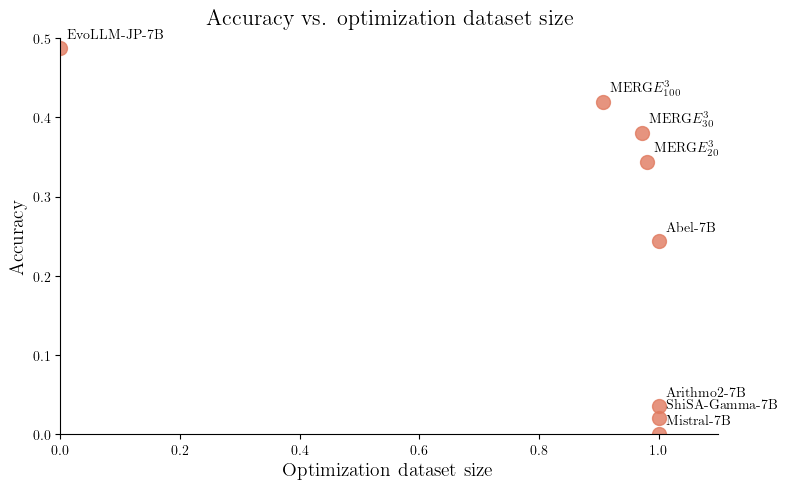

In [44]:
# ----------------------------------------------------------------------
# Create scatter plot
# ----------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 5))


# Scatter: x = dataset_size, y = accuracy
ax.scatter(
    df["data_reduction"],
    df["accuracy"],
    s=100,            # marker size
    color=color_dict['Burnt sienna'],   # marker color
    alpha=0.8         # marker transparency
)

# Optionally, annotate each point with its bin label
for i, row in df.iterrows():
    ax.annotate(
        row["bin"],
        xy=(row["data_reductionS"], row["accuracy"]),
        xytext=(5, 5),               # offset text slightly from the marker
        textcoords="offset points",
        fontsize=10,
        ha="left",
        va="bottom"
    )



# Set axes labels, limits, etc.
ax.set_xlabel("Optimization dataset size", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)

# If you know your dataset_size won't exceed 1100, for instance:
ax.set_xlim(0, 1.1)
ax.set_ylim(0, 0.5)  # If accuracy is from 0.0 to 1.0

# Add a title
ax.set_title("Accuracy vs. optimization dataset size", fontsize=16, pad=10)

# Make it pretty
sns.despine()
plt.tight_layout()
plt.show()